In [10]:

# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json


In [7]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

!kaggle datasets download -d subhamjain/loan-prediction-based-on-customer-behavior

--2023-11-25 03:53:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-11-25 03:53:58 (120 MB/s) - ‘helper_functions.py’ saved [10246/10246]

  0% 0.00/5.15M [00:00<?, ?B/s]
100% 5.15M/5.15M [00:00<00:00, 54.1MB/s]


In [8]:
from helper_functions import *

In [9]:
# UNzip data
unzip_data('/content/loan-prediction-based-on-customer-behavior.zip')

# Preprocess data

## Visualize data

In [39]:
# Train and test dirs
train_df = pd.read_csv('/content/Training Data.csv')
test_df = pd.read_csv('/content/Test Data.csv')
test_df.shape, train_df.shape

((28000, 12), (252000, 13))

In [40]:
train_df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [41]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [42]:
# Set columns to lowercase
train_df.columns = train_df.columns.str.lower()
test_df.columns = test_df.columns.str.lower()

In [43]:
train_df.columns, test_df.columns

(Index(['id', 'income', 'age', 'experience', 'married/single',
        'house_ownership', 'car_ownership', 'profession', 'city', 'state',
        'current_job_yrs', 'current_house_yrs', 'risk_flag'],
       dtype='object'),
 Index(['id', 'income', 'age', 'experience', 'married/single',
        'house_ownership', 'car_ownership', 'profession', 'city', 'state',
        'current_job_yrs', 'current_house_yrs'],
       dtype='object'))

In [44]:
train_df = train_df.drop(columns=['id'])

In [45]:
train_df.head()

,income,age,experience,married/single,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [87]:
# Change married/single because the / will create problems in the future
train_df = train_df.rename(columns={"married/single":"married_single",})
train_df.columns

Index(['income', 'age', 'experience', 'married_single', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_yrs',
       'current_house_yrs', 'risk_flag'],
      dtype='object')

In [46]:
train_df['city'].unique()

array(['Rewa', 'Parbhani', 'Alappuzha', 'Bhubaneswar',
       'Tiruchirappalli[10]', 'Jalgaon', 'Tiruppur', 'Jamnagar',
       'Kota[6]', 'Karimnagar', 'Hajipur[31]', 'Adoni', 'Erode[17]',
       'Kollam', 'Madurai', 'Anantapuram[24]', 'Kamarhati', 'Bhusawal',
       'Sirsa', 'Amaravati', 'Secunderabad', 'Ahmedabad', 'Ajmer',
       'Ongole', 'Miryalaguda', 'Ambattur', 'Indore', 'Pondicherry',
       'Shimoga', 'Chennai', 'Gulbarga', 'Khammam', 'Saharanpur',
       'Gopalpur', 'Amravati', 'Udupi', 'Howrah', 'Aurangabad[39]',
       'Hospet', 'Shimla', 'Khandwa', 'Bidhannagar', 'Bellary', 'Danapur',
       'Purnia[26]', 'Bijapur', 'Patiala', 'Malda', 'Sagar', 'Durgapur',
       'Junagadh', 'Singrauli', 'Agartala', 'Thanjavur', 'Hindupur',
       'Naihati', 'North_Dumdum', 'Panchkula', 'Anantapur', 'Serampore',
       'Bathinda', 'Nadiad', 'Kanpur', 'Haridwar', 'Berhampur',
       'Jamshedpur', 'Hyderabad', 'Bidar', 'Kottayam', 'Solapur',
       'Suryapet', 'Aizawl', 'Asansol', 'Deoghar'

In [47]:
train_df['city'] = train_df['city'].str.replace(r'\[.*?\]', '')


<ipython-input-47-b426aef387ea>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df['city'] = train_df['city'].str.replace(r'\[.*?\]', '')


In [ ]:
train_df['city'].unique()

In [51]:
train_df['state'].unique()

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Manipur', 'Sikkim'], dtype=object)

In [ ]:
train_df['state'] = train_df['state'].str.replace(r'\[.*?\]', '')

In [52]:
train_df['state'].unique()

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Manipur', 'Sikkim'], dtype=object)

In [53]:
train_df['risk_flag'].value_counts()

0    221004
1     30996
Name: risk_flag, dtype: int64

In [ ]:
train_df['risk_flag'].value_counts().plot(kind="bar")

## Encode non-numerical values

In [37]:
train_df_one_hot = pd.get_dummies(train_df)
train_df_one_hot.head()

,income,age,experience,current_job_yrs,current_house_yrs,risk_flag,married/single_married,married/single_single,house_ownership_norent_noown,house_ownership_owned,...,state_Puducherry,state_Punjab,state_Rajasthan,state_Sikkim,state_Tamil_Nadu,state_Telangana,state_Tripura,state_Uttar_Pradesh,state_Uttarakhand,state_West_Bengal
0,1303834,23,3,3,13,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7574516,40,10,9,13,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3991815,66,4,4,10,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6256451,41,2,2,12,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5768871,47,11,3,14,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [38]:
train_df_one_hot.tail()

,income,age,experience,current_job_yrs,current_house_yrs,risk_flag,married/single_married,married/single_single,house_ownership_norent_noown,house_ownership_owned,...,state_Puducherry,state_Punjab,state_Rajasthan,state_Sikkim,state_Tamil_Nadu,state_Telangana,state_Tripura,state_Uttar_Pradesh,state_Uttarakhand,state_West_Bengal
251995,8154883,43,13,6,11,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
251996,2843572,26,10,6,11,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
251997,4522448,46,7,7,12,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
251998,6507128,45,0,0,10,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
251999,9070230,70,17,7,11,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [54]:
# Create x and y values
X = train_df_one_hot.drop('risk_flag', axis=1)
y = train_df_one_hot['risk_flag']

In [55]:
X.head()

,income,age,experience,current_job_yrs,current_house_yrs,married/single_married,married/single_single,house_ownership_norent_noown,house_ownership_owned,house_ownership_rented,...,state_Puducherry,state_Punjab,state_Rajasthan,state_Sikkim,state_Tamil_Nadu,state_Telangana,state_Tripura,state_Uttar_Pradesh,state_Uttarakhand,state_West_Bengal
0,1303834,23,3,3,13,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,7574516,40,10,9,13,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3991815,66,4,4,10,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,6256451,41,2,2,12,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5768871,47,11,3,14,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


# Start training process

In [57]:
# Create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)
len(X_train), len(X_test), len(y_train), len(y_test)

(201600, 50400, 201600, 50400)

## Model 1

In [60]:
from tensorflow.keras import layers, Sequential
tf.random.set_seed(42)

model_1 = Sequential([
    layers.Dense(1),
    layers.Dense(1)
])

model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model_1.fit(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_test, y_test)
)


Epoch 1/10
6300/6300 [==============================] - 22s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/10
6300/6300 [==============================] - 19s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/10
6300/6300 [==============================] - 21s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/10
6300/6300 [==============================] - 18s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/10
6300/6300 [==============================] - 21s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/10
6300/6300 [==============================] - 19s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/10
6300/6300 [==============================] - 20s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/10
6300/6300 [==============================] - 24s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/10
6300/

## Model 2

In [64]:
tf.random.set_seed(42)

model_2 = Sequential([
    layers.Dense(100),
    layers.Dense(10),
    layers.Dense(1)
])

model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

history_model_2 = model_2.fit(
    X_train,
    y_train,
    epochs=5,
    validation_data=(X_test, y_test)
)


Epoch 1/5
6300/6300 [==============================] - 23s 3ms/step - loss: 15411.0195 - mae: 15411.0195 - val_loss: 17222.0117 - val_mae: 17222.0117
Epoch 2/5
6300/6300 [==============================] - 20s 3ms/step - loss: 4870.6392 - mae: 4870.6392 - val_loss: 2123.9849 - val_mae: 2123.9849
Epoch 3/5
6300/6300 [==============================] - 22s 4ms/step - loss: 1542.2877 - mae: 1542.2877 - val_loss: 1305.2034 - val_mae: 1305.2034
Epoch 4/5
6300/6300 [==============================] - 20s 3ms/step - loss: 633.4103 - mae: 633.4103 - val_loss: 281.1464 - val_mae: 281.1464
Epoch 5/5
6300/6300 [==============================] - 21s 3ms/step - loss: 204.2737 - mae: 204.2737 - val_loss: 47.9478 - val_mae: 47.9478


In [62]:
model_2_eval = model_2.evaluate(X_test, y_test)
model_2_eval

1575/1575 [==============================] - 3s 2ms/step - loss: 0.4605 - mae: 0.4605


[0.4605453610420227, 0.4605453610420227]

Text(0.5, 0, 'epochs')

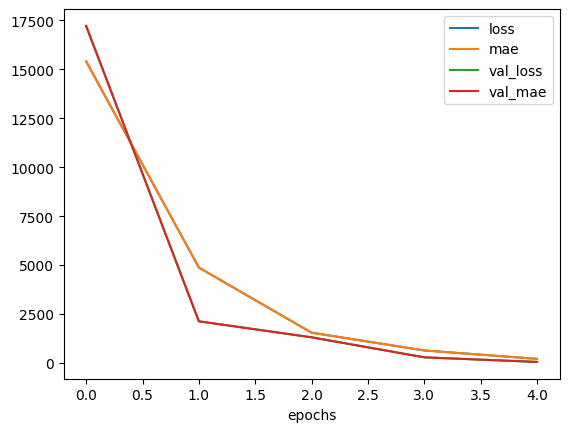

In [66]:
# PLot loss curve
pd.DataFrame(history_model_2.history).plot()
plt.xlabel('loss')
plt.xlabel('epochs')

# Model 3
Same as model 2, but trained for longer

In [67]:
tf.random.set_seed(42)

model_3 = Sequential([
    layers.Dense(100),
    layers.Dense(10),
    layers.Dense(1)
])

model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

history_model_3 = model_3.fit(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_test, y_test)
)


Epoch 1/10
6300/6300 [==============================] - 30s 5ms/step - loss: 12748.7490 - mae: 12748.7490 - val_loss: 25130.4102 - val_mae: 25130.4102
Epoch 2/10
6300/6300 [==============================] - 22s 4ms/step - loss: 4754.6401 - mae: 4754.6401 - val_loss: 2379.6160 - val_mae: 2379.6160
Epoch 3/10
6300/6300 [==============================] - 20s 3ms/step - loss: 848.7155 - mae: 848.7155 - val_loss: 62.9757 - val_mae: 62.9757
Epoch 4/10
6300/6300 [==============================] - 21s 3ms/step - loss: 8.9148 - mae: 8.9148 - val_loss: 0.1242 - val_mae: 0.1242
Epoch 5/10
6300/6300 [==============================] - 21s 3ms/step - loss: 7.0801 - mae: 7.0801 - val_loss: 0.1241 - val_mae: 0.1241
Epoch 6/10
6300/6300 [==============================] - 23s 4ms/step - loss: 3.8603 - mae: 3.8603 - val_loss: 0.1246 - val_mae: 0.1246
Epoch 7/10
6300/6300 [==============================] - 21s 3ms/step - loss: 1.9832 - mae: 1.9832 - val_loss: 0.1243 - val_mae: 0.1243
Epoch 8/10
6300/6300 

In [68]:
model_3_eval = model_3.evaluate(X_test, y_test)
model_3_eval

1575/1575 [==============================] - 3s 2ms/step - loss: 0.1241 - mae: 0.1241


[0.12411946803331375, 0.12411946803331375]

Text(0.5, 0, 'epochs')

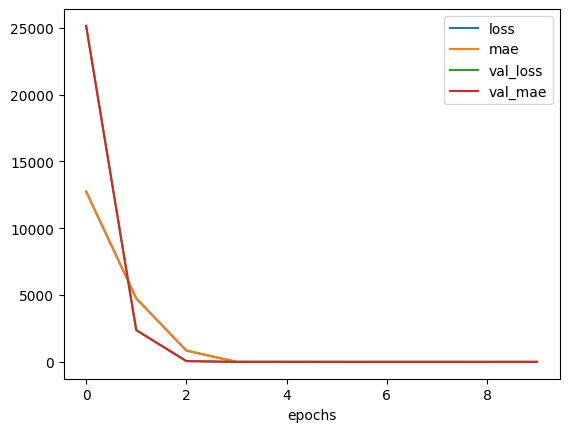

In [69]:
# PLot loss curve
pd.DataFrame(history_model_3.history).plot()
plt.xlabel('loss')
plt.xlabel('epochs')

# Preprocessing data (normalization and standardization)

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

train_df_no_norm =  train_df
train_df_no_norm.head()

,income,age,experience,married_single,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli,Tamil_Nadu,3,14,1


In [107]:
train_df_no_norm.columns

Index(['income', 'age', 'experience', 'married_single', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_yrs',
       'current_house_yrs', 'risk_flag'],
      dtype='object')

In [123]:
from sklearn.preprocessing import MinMaxScaler

# Select the numerical columns for normalization
numerical_columns = [col for col in train_df_one_hot.columns]

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization to the selected numerical columns
train_df_one_hot[numerical_columns] = scaler.fit_transform(train_df_one_hot[numerical_columns])

# Now, train_df_one_hot contains normalized values for the specified numerical columns


In [125]:
# Create X & y
X = train_df_one_hot.drop('risk_flag', axis=1)
y = train_df_one_hot['risk_flag']



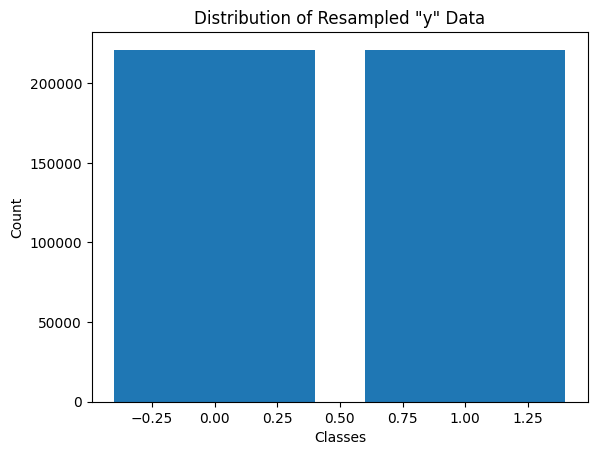

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns
y = pd.Series(y)
value_counts = y.value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Distribution of Resampled "y" Data')

# Display the plot
plt.show()

In [150]:
from imblearn.over_sampling import RandomOverSampler
sm=RandomOverSampler()
X,y=sm.fit_resample(X,y)

In [152]:
# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [153]:
len(X_train), len(X_test), len(y_train), len(y_test)

(353606, 88402, 353606, 88402)

## Model 4
Same as model 3, but with normalized data

In [154]:
tf.random.set_seed(42)

model_4 = Sequential([
    layers.Dense(100),
    layers.Dense(10),
    layers.Dense(1)
])

model_4.compile(
    loss = tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

history_model_4 = model_4.fit(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_test, y_test)
)


Epoch 1/10
11051/11051 [==============================] - 46s 4ms/step - loss: 0.4363 - mae: 0.4363 - val_loss: 0.4254 - val_mae: 0.4254
Epoch 2/10
11051/11051 [==============================] - 48s 4ms/step - loss: 0.4254 - mae: 0.4254 - val_loss: 0.4219 - val_mae: 0.4219
Epoch 3/10
11051/11051 [==============================] - 41s 4ms/step - loss: 0.4231 - mae: 0.4231 - val_loss: 0.4198 - val_mae: 0.4198
Epoch 4/10
11051/11051 [==============================] - 44s 4ms/step - loss: 0.4219 - mae: 0.4219 - val_loss: 0.4192 - val_mae: 0.4192
Epoch 5/10
11051/11051 [==============================] - 41s 4ms/step - loss: 0.4210 - mae: 0.4210 - val_loss: 0.4194 - val_mae: 0.4194
Epoch 6/10
11051/11051 [==============================] - 42s 4ms/step - loss: 0.4205 - mae: 0.4205 - val_loss: 0.4181 - val_mae: 0.4181
Epoch 7/10
11051/11051 [==============================] - 42s 4ms/step - loss: 0.4200 - mae: 0.4200 - val_loss: 0.4178 - val_mae: 0.4178
Epoch 8/10
11051/11051 [=================

In [160]:
model_4_results = model_4.evaluate(X_test, y_test)
model_4_results

2763/2763 [==============================] - 7s 3ms/step - loss: 0.4190 - mae: 0.4190


[0.41899919509887695, 0.41899919509887695]

In [161]:
model_3_eval

[0.12411946803331375, 0.12411946803331375]

In [162]:
model_3_eval[1] == model_4_results[1]

False

In [163]:
model_4_preds = model_4.predict(X_test)
model_4_preds

2763/2763 [==============================] - 6s 2ms/step


array([[ 0.00786194],
       [-0.01408309],
       [ 0.9643571 ],
       ...,
       [ 0.9553141 ],
       [ 0.9527579 ],
       [ 0.04645459]], dtype=float32)

In [164]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming y_test is the actual labels for your test set

# Convert predicted probabilities to binary predictions using a threshold
new_threshold = 0.5
binary_predictions = (model_4_preds >= new_threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, binary_predictions)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision
precision = precision_score(y_test, binary_predictions)
print(f'Precision: {precision:.4f}')

# Calculate recall
recall = recall_score(y_test, binary_predictions)
print(f'Recall: {recall:.4f}')

# Calculate F1 score
f1 = f1_score(y_test, binary_predictions)
print(f'F1 Score: {f1:.4f}')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, binary_predictions)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.5859
Precision: 0.5776
Recall: 0.6308
F1 Score: 0.6030
Confusion Matrix:
[[23991 20332]
 [16275 27804]]


In [165]:
import pandas as pd

# Assuming X_test is your DataFrame
# model_4_preds is your array of predicted probabilities

# Create a new DataFrame to store the results
results_df = pd.DataFrame(X_test)  # You can modify this if X_test has an index

# Add a new column for predicted probabilities
results_df['predicted_prob'] = model_4_preds

# Display the DataFrame with predicted probabilities
print(results_df.head())

          income       age  experience  current_job_yrs  current_house_yrs  \
21368   0.047536  0.896552        0.75         0.214286               0.75   
86007   0.553617  0.948276        0.95         0.500000               0.50   
430487  0.497196  0.068966        0.35         0.500000               0.00   
183601  0.172125  0.120690        0.30         0.357143               0.00   
135249  0.917294  0.448276        0.15         0.214286               0.50   

        married/single_married  married/single_single  \
21368                      0.0                    1.0   
86007                      0.0                    1.0   
430487                     0.0                    1.0   
183601                     1.0                    0.0   
135249                     0.0                    1.0   

        house_ownership_norent_noown  house_ownership_owned  \
21368                            0.0                    1.0   
86007                            1.0                    0.0   

In [169]:
results_df['predicted_class'].value_counts()

1    48136
0    40266
Name: predicted_class, dtype: int64

In [168]:
train_df.head()

,income,age,experience,married_single,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli,Tamil_Nadu,3,14,1


# Lets imrpvoe model

# Model 5